## Install tensorflow and restart runtime

In [25]:
!python -m pip install --user --upgrade tensorflow==1.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import library

In [1]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns

/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/root/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type

##  Data processing

- Import dataset
- Normalizing the dataset
  - The image value is from 0 to 255
  - We can normalize data by changing the range from (0 to 255) to (0 to 1)
  - The reason we normalize the dataset is that when color change we do not have care about it
- Reshape image in order to apply CNN
  - Reshape image in order to apply CNN
  - The input image shape of TensorFlow has to be (number_of_image, image_size, image_size, color_channel)
  - We have to convert the image shape (number_of_image, image_size, image_size) to (number_of_image, image_size, image_size, color_channel)
  - We have to add the color channel to the dimension
  - It is the gray scale image, so the coler channel is 1
  - If it were in color, the color channel would be 3
- One hot encode
  - We also know that there are 10 classes and that classes are represented as unique integers
  - We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function

> Reference

> https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [2]:
# import dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
# Look at dataset
print("X_train %s \ny_train %s \nX_test %s \ny_test %s" % (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train (60000, 28, 28) 
y_train (60000,) 
X_test (10000, 28, 28) 
y_test (10000,)


In [4]:
print(
    "The training set contains %s images and the testing set contains %s images" % (X_train.shape[0], X_test.shape[0]))
print("The training input vector is of the dimension %s X %s X %s" % (
    X_train.shape[0], X_train.shape[1], X_train.shape[2]))
print("The training output vector is of the dimension %s X 1" % (y_train.shape[0]))
print("Each individual input vector is of the dimension %s X %s" % (X_train.shape[1], X_train.shape[2]))
print("Each individual output vector is of the dimension 1")

The training set contains 60000 images and the testing set contains 10000 images
The training input vector is of the dimension 60000 X 28 X 28
The training output vector is of the dimension 60000 X 1
Each individual input vector is of the dimension 28 X 28
Each individual output vector is of the dimension 1


class label  5


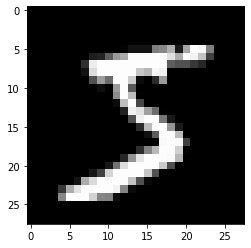

In [5]:
# Check the image
print("class label ", y_train[0])
plt.imshow(X_train[0], cmap=plt.get_cmap("gray"))
plt.show()

In [6]:
rows, cols = 9, 9

plt.figure(figsize=(10, 10))

for i in range(rows * cols):
    plt.subplot(cols, rows, i + 1)
    plt.imshow(X_train[i], cmap=plt.get_cmap("gray"))

In [7]:
# Normalizing the dataset
# The image value is from 0 to 255
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# We can normalize data by changing the range from (0 to 255) to (0 to 1)
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# Reshape image in order to apply CNN
# The input image shape of TensorFlow has to be (number_of_image, image_size, image_size, color_channel)
# We have to convert the image shape (number_of_image, image_size, image_size) to (number_of_image, image_size, image_size, color_channel)
# We have to add the color channel to the dimension
# It is the gray scale image, so the color channel is 1
# If it were in color, the color channel would be 3

print("Before reshape: ", X_train.shape)

# https://stackoverflow.com/questions/45024328/resize-mnist-in-tensorflow
# Create the color channel
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
# The input image size in the original paper is 32 X 32
# Use the tensorflow to resize the image from 28x28 to 32x32
X_train = tf.image.resize(X_train, [32, 32])
X_test = tf.image.resize(X_test, [32, 32])
# Convert the tensor to numpy array
# https://blog.finxter.com/how-to-convert-a-tensor-to-a-numpy-array-in-tensorflow/
# # TensorFlow version 2.x
# X_train = X_train.numpy()
# X_test = X_test.numpy()
# TensorFlow version 1.x
X_train = X_train.eval(session=tf.compat.v1.Session())
X_test = X_test.eval(session=tf.compat.v1.Session())

print("After reshape: ", X_train.shape)

# # https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df
# # Use the tensorflow to resize the image from 28x28 to 32x32
# X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
# X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])/255
# print(X_train.shape)
# # Create the color channel
# X_train = tf.expand_dims(X_train, axis=3, name=None)
# X_test = tf.expand_dims(X_test, axis=3, name=None)
# print(X_train.shape)
# # Convert the tensor to numpy array
# X_train = X_train.numpy()
# X_test = X_test.numpy()

Before reshape:  (60000, 28, 28)
After reshape:  (60000, 32, 32, 1)


class label  5


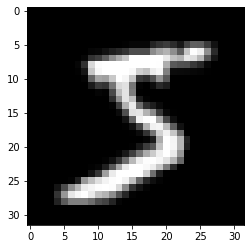

In [10]:
# Check the image
print("class label ", y_train[0])
image_size = X_train.shape[1]
plt.imshow(X_train[0].reshape(image_size, image_size), cmap=plt.get_cmap("gray"))
plt.show()

In [11]:
# One hot encode
# We also know that there are 10 classes and that classes are represented as unique integers
unique_y_train = np.unique(y_train)
unique_y_train.size

10

In [12]:
# We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function
print(y_train[0])
print(y_train.shape)
print(y_test[0])
print(y_test.shape)
print("One hot encode")
# One Hot Encode y label
# Convert
# 5
# To
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
# https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-one-hot-encoded-array-in-numpy
y_train = np.eye(unique_y_train.size)[y_train]
y_test = np.eye(unique_y_train.size)[y_test]
print(y_train[0])
print(y_train.shape)
print(y_test[0])
print(y_test.shape)

5
(60000,)
7
(10000,)
One hot encode
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(10000, 10)


## Building up model

- The tensorflow high level API such as Keras are very convenient to use and it can create CNN model easier, because it has the built-in function to train data, evaluate data, predict data, and save the model
- However, it is very difficult to understand the model and the code
- So, in this project, I will build up the model from scratch using the tensorflow low level API in order to understand the fundamental of CNN

1_ueA-rooOaiIo3s2rVVz3Ww.png

$Input\ 32x32x1 \xrightarrow[\text{filter size: 5x5, stride: 1, padding: 0, number of filter: 6}]{\text{Convolution}}$

$C1\ Convolutional\ Layer\ shape\ \frac{W - Fw + 2P}{Sw} + 1 = \frac{32 - 5 + 0}{1} + 1 = 28, \frac{H - Fh + 2P}{Sh} + 1 = \frac{32 - 5 + 0}{1} + 1 = 28, shape\ 28x28x6\ $$\xrightarrow[\text{filter size: 2x2, stride: 2, padding: 0}]{\text{Average pooling}}$

$S2\ Subsampling\ Layer\ shape\ \frac{W - Fw + 2P}{Sw} + 1 = \frac{28 - 2 + 0}{2} + 1 = 14, \frac{H - Fh + 2P}{Sh} + 1 = \frac{28 - 2 + 0}{2} + 1 = 14, shape\ 14x14x6\ $$\xrightarrow[\text{filter size: 5x5, stride: 1, padding: 0, number of filter: 16}]{\text{Convolution}}$

$C3\ Convolutional\ Layer\ shape\ \frac{W - Fw + 2P}{Sw} + 1 = \frac{14 - 5 + 0}{1} + 1 = 10, \frac{H - Fh + 2P}{Sh} + 1 = \frac{14 - 5 + 0}{1} + 1 = 10, shape\ 10x10x16\ $$\xrightarrow[\text{filter size: 2x2, stride: 2, padding: 0}]{\text{Average pooling}}$

$S4\ Subsampling\ Layer\ shape\ \frac{W - Fw + 2P}{Sw} + 1 = \frac{10 - 2 + 0}{2} + 1 = 5, \frac{H - Fh + 2P}{Sh} + 1 = \frac{10 - 2 + 0}{2} + 1 = 5, shape\ 5x5x16 = 400\ $$\xrightarrow[\text{}]{\text{Flatten}}$

$Flatten\ layer\ 1x1x400\ linear\ vector\ $$\xrightarrow[\text{}]{\text{fully connected layer with 120 neurons}}$

$C5\ Fully\ Connected\ Layer\ 1x1x120\ linear\ vector\ $$\xrightarrow[\text{}]{\text{fully connected layer with 84 neurons}}$

$F6\ Fully\ Connected\ Layer\ 1x1x84\ linear\ vector\ $$\xrightarrow[\text{}]{\text{fully connected layer with 10 neurons}}$

$Output\ layer\ 10$


- The input image size in the original paper is 32 X 32
- The original paper does not use ReLUs as the activation function, but it is working better, so the model is going to use the ReLUs as the activation function
- In the first convolution, 
  - the number of filter is 6 and 
  - the filter size is 5 X 5 
  - the filter move 1 pixel every time
  - So, the C1 feature map contains 6 layers and the size of every layer is 28 X 28, matrix size of 32 X matrix of size 5 = matrix of size 28, 32 - 5 + 1 = 28, ((Input-filter size)/ stride)+1
- In the first subsampling, 
  - the AveragePooling is implemented 
    - The pool_size=(2, 2), strides=(2, 2)
    - so, the filter matrix is 2 X 2 and it move 2 pixel every time
  - So, the S2 feature map contains 6 layers, it is as same as C1 and it is not changed, and the size of every layer is 14 X 14, it is the half size of 28 in C1
- In the second convolution, 
  - the number of filter is 16 and 
  - the filter size is 5 X 5
  - the filter move 1 pixel every time
  - So, the C3 feature map contains 16 layers and the size of every layer is 10 X 10, matrix size of 14 X matrix of size 5 = matrix of size 10, 14 - 5 + 1 = 10
- In the second subsampling, 
  - the AveragePooling is implemented 
    - The pool_size=(2, 2), strides=(2, 2)
    - so, the filter matrix is 2 X 2 and it move 2 pixel every time
  - So, the S4 feature map contains 16 layers, it is as same as C3 and it is not changed, and the size of every layer is 5 X 5, it is the half size of 5 in C3
- Next, the full connection is implemented. LeNet’s dense block has three fully connected layers 
  - The first dense unit is 120, the second unit is 84, and the third dense is the number class, which is 10 classes

> Reference
> - CNN
  - https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243
> - LeNet CNN 
  - https://medium.com/@RaghavPrabhu/cnn-architectures-lenet-alexnet-vgg-googlenet-and-resnet-7c81c017b848

In [13]:
# Create the model
def LeNet(input_image, color_channel, num_label):
    """
    LeNet-5 Architecture:
    Input -> C1 Convolution -> S2 Subsampling -> C3 Convolution -> S4 Subsampling -> C5 Fully Connected -> F6 Fully Connected -> Output
    LeNet-5 Architecture explanation:
    Input 32x32x1 --conv1 filter size: 5x5x6 stride: 1-->
    C1 Convolutional Layer 28x28x6 --average pooling filter size: 2x2 stride: 2-->
    S2 Subsampling Layer 14x14x6 --conv2 filter size: 5x5x16 stride: 1-->
    C3 Convolutional Layer 10x10x16 --average pooling filter size: 2x2 stride: 2-->
    S4 Subsampling Layer 5x5x16 --flatten-->
    Flatten 400 --fully connected layer with 120 neurons-->
    C5 Fully Connected Layer 120 --fully connected layer with 84 neurons-->
    F6 Fully Connected Layer 84 --fully connected layer with 10 neurons-->
    Output layer 10
    """
    mu = 0
    sigma = 0.1
    print("Input shape: ", input_image.get_shape().as_list())
    # C1 Convolutional Layer input_image: 32x32x1, output: 28x28x6
    # filter size is 5x5
    filter_width = 5
    filter_height = 5
    # the number of filter is 6
    # the dimensionality of the output space (i.e. the number of output filters in the convolution)
    C1_filter_depth = 6
    # the stride is 1
    stride = 1
    # Create the weight and bias
    conv1_Weight = tf.Variable(
        tf.truncated_normal(shape=(filter_height, filter_width, color_channel, C1_filter_depth), mean=mu, stddev=sigma))
    conv1_bias = tf.Variable(tf.zeros(C1_filter_depth))
    # Create the convolutional layer
    conv1 = tf.nn.conv2d(input=input_image, filter=conv1_Weight, strides=[1, stride, stride, 1], padding='VALID') + conv1_bias
    # Activation
    conv1 = tf.nn.relu(conv1)
    # print shape 28x28x6
    print("conv1 shape: ", conv1.get_shape().as_list())

    # S2 Pooling Layer input: 28x28x6, output: 14x14x6
    # average pooling
    # filter size is 2x2
    filter_width = 2
    filter_height = 2
    # the stride is 2
    stride = 2
    # Create the subsampling layer
    s2 = tf.nn.avg_pool(value=conv1, ksize=[1, filter_height, filter_width, 1], strides=[1, stride, stride, 1],
                        padding='VALID')
    # print shape 14x14x6
    print("s2 shape: ", s2.get_shape().as_list())

    # C3 Convolutional Layer input: 14x14x6, output: 10x10x16
    # filter size is 5x5
    filter_width = 5
    filter_height = 5
    # the number of filter is 16
    # the dimensionality of the output space (i.e. the number of output filters in the convolution)
    C3_filter_depth = 16
    # the stride is 1
    stride = 1
    # Create the weight and bias
    conv3_Weight = tf.Variable(
        tf.truncated_normal(shape=(filter_height, filter_width, C1_filter_depth, C3_filter_depth), mean=mu,
                            stddev=sigma))
    conv3_bias = tf.Variable(tf.zeros(C3_filter_depth))
    # Create the convolutional layer
    conv3 = tf.nn.conv2d(input=s2, filter=conv3_Weight, strides=[1, stride, stride, 1], padding='VALID') + conv3_bias
    # Activation
    conv3 = tf.nn.relu(conv3)
    # print shape 10x10x16
    print("conv3 shape: ", conv3.get_shape().as_list())

    # S4 Pooling Layer input: 10x10x16, output: 5x5x16
    # average pooling
    # filter size is 2x2
    filter_width = 2
    filter_height = 2
    # the stride is 2
    stride = 2
    # Create the subsampling layer
    s4 = tf.nn.avg_pool(value=conv3, ksize=[1, filter_height, filter_width, 1], strides=[1, stride, stride, 1],
                        padding='VALID')
    # print shape 5x5x16
    print("s4 shape: ", s4.get_shape().as_list())

    # Flatten the output
    # Flatten. Input = 5x5x16. Output = 400.
    flatten_layer = flatten(s4)
    # print shape 400
    print("Flatten shape: ", flatten_layer.get_shape().as_list())

    # C5 Fully Connected Layer input: 400, output: 120
    # Create the weight and bias
    C5_fc_Weight = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    C5_fc_bias = tf.Variable(tf.zeros(120))
    # Create the fully connected layer
    C5_fc = tf.matmul(flatten_layer, C5_fc_Weight) + C5_fc_bias
    # Activation
    C5_fc = tf.nn.relu(C5_fc)
    # print shape 120
    print("C5 Fully Connected Layer shape: ", C5_fc.get_shape().as_list())

    # F6 Fully Connected Layer input: 120, output: 84
    # Create the weight and bias
    F6_fc_Weight = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    F6_fc_bias = tf.Variable(tf.zeros(84))
    # Create the fully connected layer
    F6_fc = tf.matmul(C5_fc, F6_fc_Weight) + F6_fc_bias
    # Activation
    F6_fc = tf.nn.relu(F6_fc)
    # print shape 84
    print("F6 Fully Connected Layer shape: ", F6_fc.get_shape().as_list())

    # Output Layer input: 84, output: 10 num_label
    # Create the weight and bias
    Output_Layer_Weight = tf.Variable(tf.truncated_normal(shape=(84, num_label), mean=mu, stddev=sigma))
    Output_Layer_bias = tf.Variable(tf.zeros(num_label))
    # Create the fully connected layer
    logits = tf.matmul(F6_fc, Output_Layer_Weight) + Output_Layer_bias
    # print shape 10
    print("OUTPUT shape: ", logits.get_shape().as_list())

    return logits

In [14]:
# # Create TensorFlow placeholders for the input and output
# x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[1], X_train.shape[3]))
# y = tf.placeholder(tf.int32, (None))
# # Create the LeNet model
# logits = LeNet(x, X_train.shape[3], len(y_train[1]))
# # Train the model
# # https://medium.com/@RaghavPrabhu/kaggles-digit-recogniser-using-tensorflow-lenet-architecture-92511e68cee1
# def train_model(x, y, logits, epochs, batch_size, X_train, y_train):
#     # Apply the softmax function implementation to calculate cost function
#     cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
#     loss_operation = tf.reduce_mean(cross_entropy)
#     # Apply an optimiser called ‘AdamOptimizer’ to minimise the cost function
#     optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
#     training_operation = optimizer.minimize(loss_operation)
#     # Create the accuracy to evaluate the model
#     correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
#     accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     # Create saver to save the model
#     saver = tf.train.Saver()

#     def evaluate(X_data, y_data):
#         num_examples = len(X_data)
#         total_accuracy = 0
#         sess = tf.get_default_session()
#         for offset in range(0, num_examples, batch_size):
#             batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
#             accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
#             total_accuracy += (accuracy * len(batch_x))
#         return total_accuracy / num_examples

#     # Train the model
#     # Create a session and run the dataset in batch process to train the model
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
#         num_examples = len(X_train)
#         print("Training...")
#         print()
#         for i in range(epochs):
#             X_train, y_train = shuffle(X_train, y_train)
#             for offset in range(0, num_examples, batch_size):
#                 end = offset + batch_size
#                 batch_x, batch_y = X_train[offset:end], y_train[offset:end]
#                 sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
#             validation_accuracy = evaluate(X_test, y_test)
#             print("EPOCH {} ...".format(i + 1))
#             print("Validation Accuracy = {:.3f}".format(validation_accuracy))
#             print()
#         saver.save(sess, './lenet.ckpt')
#         print("Model saved")

#         test_accuracy = evaluate(X_train, y_train)
#         print("Test Accuracy = {:.3f}".format(test_accuracy))
# # Train the model
# train_model(x=x, y=y, logits=logits, epochs=10, batch_size=32, X_train=X_train, y_train=y_train)

## Create train tensor for prediction

In [15]:
# Create TensorFlow placeholders for the input and output
x_train_tf = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[1], X_train.shape[3]))
y_train_tf = tf.placeholder(tf.int32, (None))

In [16]:
# Create the LeNet model for the training
logits = LeNet(x_train_tf, X_train.shape[3], len(y_train[1]))
# Predictions for the training
train_prediction = tf.nn.softmax(logits) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.


Input shape:  [None, 32, 32, 1]
conv1 shape:  [None, 28, 28, 6]
s2 shape:  [None, 14, 14, 6]
conv3 shape:  [None, 10, 10, 16]
s4 shape:  [None, 5, 5, 16]
Flatten shape:  [None, 400]
C5 Fully Connected Layer shape:  [None, 120]
F6 Fully Connected Layer shape:  [None, 84]
OUTPUT shape:  [None, 10]


## Create optimiser

In [17]:
# Apply the softmax function implementation to calculate cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_train_tf, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
# Apply an optimiser called ‘AdamOptimizer’ to minimise the cost function
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Use TensorFlow session to train

In [18]:
epoch = 10000
batch_size = 32
loss_list = []
accuracy_list = []
testing_accuracy = 0
# https://github.com/choznerol/TensorFlow-LaNet5-implementation/blob/master/TensorFlow-LaNet5-implementation.ipynb
# Use TensorFlow session to train
with tf.Session() as session:
  tf.initialize_all_variables().run()
  for step in range(epoch):
    offset = (step * batch_size) % (y_train.shape[0] - batch_size)
    batch_data = X_train[offset:(offset + batch_size), :, :, :]
    batch_labels = y_train[offset:(offset + batch_size), :]
    feed_dict = {x_train_tf : batch_data, y_train_tf : batch_labels}
    _, l, predictions = session.run([optimizer, loss_operation, train_prediction], feed_dict=feed_dict)
    if (step % 100 == 0):
      print('loss: %.1f \t accuracy: %.1f' % (l, 100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(batch_labels, 1)) / predictions.shape[0]))
      loss_list.append(l)
      accuracy_list.append(100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(batch_labels, 1)) / predictions.shape[0])
  # Create saver
  tf.train.Saver().save(session, "lenet.ckpt")
  # https://www.kaggle.com/code/pouryaayria/convolutional-neural-networks-tutorial-tensorflow
  # Calculate prediction
  y_pred_cls = tf.argmax(logits, 1)
  feed_dict = {x_train_tf: X_test, y_train_tf: y_test}
  cls_pred = session.run(y_pred_cls, feed_dict=feed_dict)

  # # https://www.kaggle.com/code/pouryaayria/convolutional-neural-networks-tutorial-tensorflow
  # # Calculate accuracy
  # y_true_cls =  tf.argmax(y_train_tf, 1)
  # y_pred_cls = tf.argmax(logits, 1)
  # correct_model = tf.equal(y_pred_cls,y_true_cls)
  # feed_dict = {x_train_tf: X_test, y_train_tf: y_test}
  # accuracy = tf.reduce_mean(tf.cast(correct_model, tf.float32))
  # testing_accuracy = session.run(accuracy, feed_dict=feed_dict)
  # # Calculate prediction
  # cls_pred = session.run(y_pred_cls, feed_dict=feed_dict)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


loss: 2.3 	 accuracy: 3.1
loss: 0.4 	 accuracy: 87.5
loss: 0.4 	 accuracy: 87.5
loss: 0.2 	 accuracy: 96.9
loss: 0.1 	 accuracy: 96.9
loss: 0.2 	 accuracy: 87.5
loss: 0.2 	 accuracy: 93.8
loss: 0.1 	 accuracy: 96.9
loss: 0.0 	 accuracy: 100.0
loss: 0.1 	 accuracy: 93.8
loss: 0.1 	 accuracy: 100.0
loss: 0.1 	 accuracy: 96.9
loss: 0.1 	 accuracy: 96.9
loss: 0.2 	 accuracy: 96.9
loss: 0.0 	 accuracy: 100.0
loss: 0.1 	 accuracy: 93.8
loss: 0.1 	 accuracy: 96.9
loss: 0.0 	 accuracy: 100.0
loss: 0.2 	 accuracy: 93.8
loss: 0.2 	 accuracy: 90.6
loss: 0.0 	 accuracy: 100.0
loss: 0.2 	 accuracy: 90.6
loss: 0.1 	 accuracy: 93.8
loss: 0.1 	 accuracy: 100.0
loss: 0.1 	 accuracy: 96.9
loss: 0.1 	 accuracy: 96.9
loss: 0.0 	 accuracy: 100.0
loss: 0.1 	 accuracy: 96.9
loss: 0.0 	 accuracy: 100.0
loss: 0.0 	 accuracy: 100.0
loss: 0.1 	 accuracy: 93.8
loss: 0.1 	 accuracy: 96.9
loss: 0.3 	 accuracy: 90.6
loss: 0.1 	 accuracy: 96.9
loss: 0.0 	 accuracy: 100.0
loss: 0.0 	 accuracy: 100.0
loss: 0.0 	 accura

## Analysis the model
  - Print testing accuracy
  - Plot loss
  - Plot accuracy
  - Plot confusion matrix
  - Plot misclassification



In [19]:
# The true label in test dataset
y_test_cls = np.argmax(y_test, axis=1)
# Calculate accuracy
count = 0
for i in range(len(cls_pred)):
  if cls_pred[i] == y_test_cls[i]:
    count = count + 1
testing_accuracy = count / len(y_test_cls)
print("Using test dataset to calculate testing accuracy: ", testing_accuracy)

Using test dataset to calculate testing accuracy:  0.9892


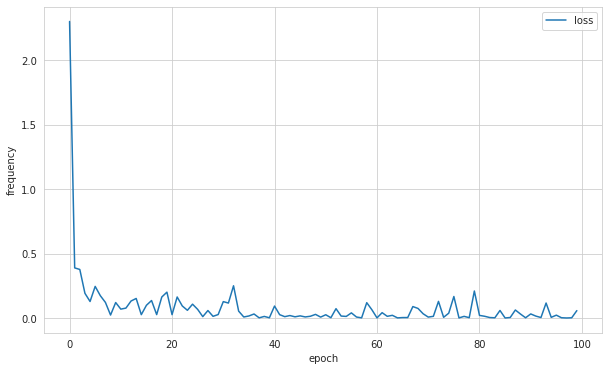

In [20]:
 # Plot style and size
sns.set_style("whitegrid")
plt.subplots(figsize=(10,6))
# x axis and y axis
loss = loss_list
epoch = list(range(len(loss)))

sns.lineplot(x = epoch, y = loss, label="loss").set(xlabel='epoch', ylabel='frequency')

plt.show()

In [21]:
# Plot style and size
sns.set_style("whitegrid")
plt.subplots(figsize=(10,6))
# x axis and y axis
accuracy = accuracy_list
epoch = list(range(len(accuracy)))

sns.lineplot(x = epoch, y = accuracy, label="accuracy").set(xlabel='epoch', ylabel='frequency')

plt.show()

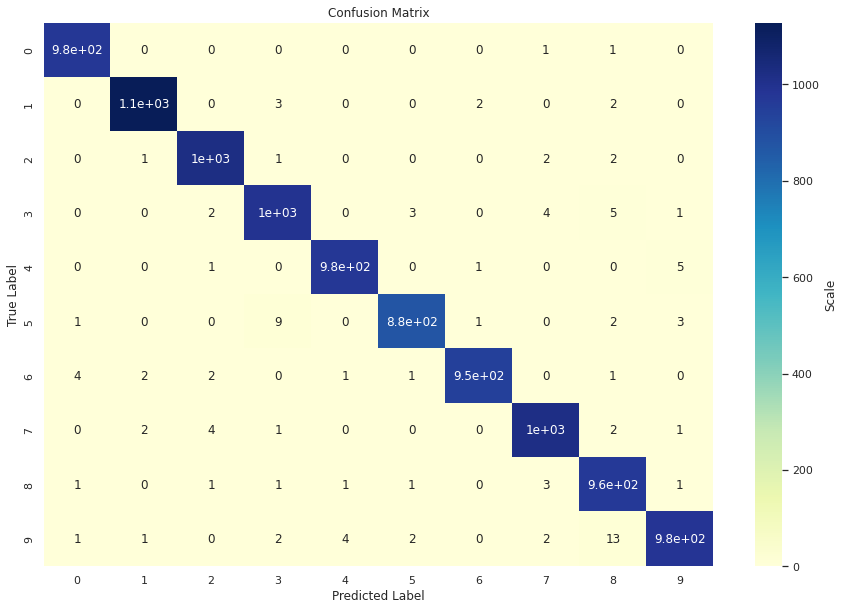

In [22]:
 # Confusion Matrix
confusion_matrix_data = confusion_matrix(y_true=y_test_cls, y_pred=cls_pred)
# Plot confusion matrix
# https://onestopdataanalysis.com/confusion-matrix-python/
def plot_confusion_matrix(data, labels):
  """Plot confusion matrix using heatmap.

  Args:
      data (list of list): List of lists with confusion matrix data.
      labels (list): Labels which will be plotted across x and y axis.

  """
  sns.set(color_codes=True)
  plt.figure(1, figsize=(15, 10))

  plt.title("Confusion Matrix")

  sns.set(font_scale=1)
  ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})

  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)

  ax.set(ylabel="True Label", xlabel="Predicted Label")

  plt.show()

labels = list(range(0, 10))

plot_confusion_matrix(confusion_matrix_data, labels)

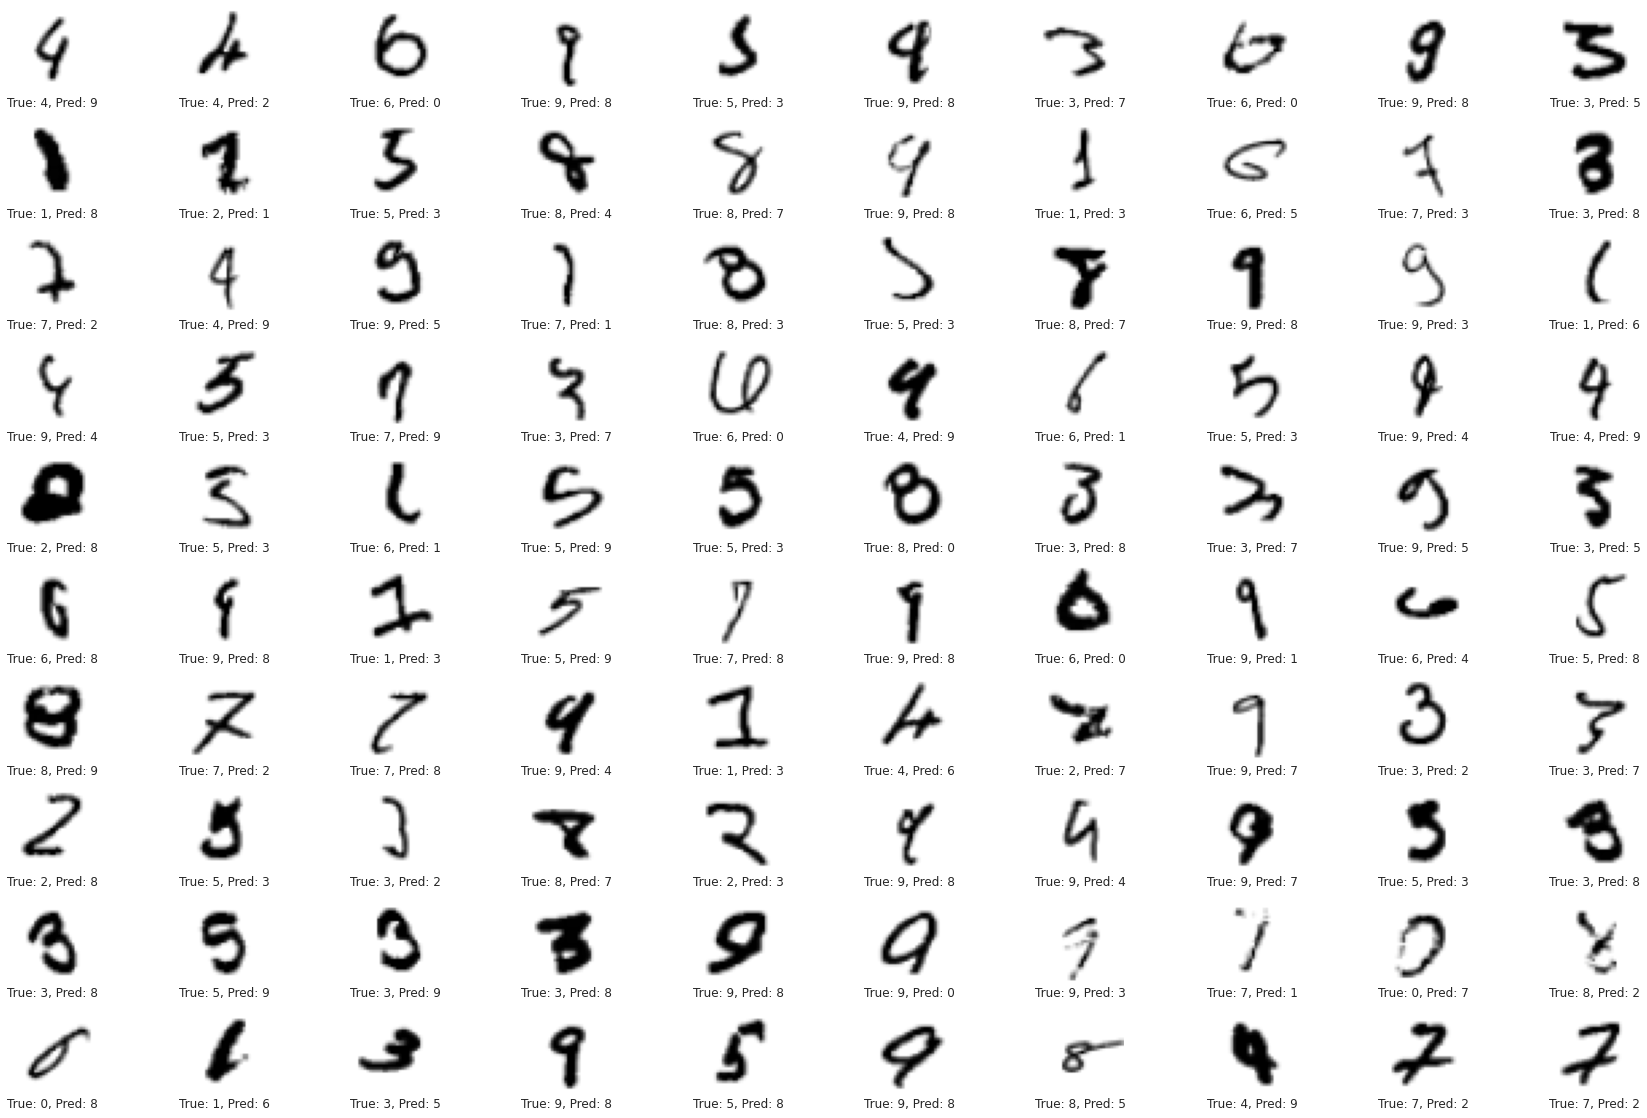

In [23]:
# https://www.kaggle.com/code/pouryaayria/convolutional-neural-networks-tutorial-tensorflow
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 100
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(10, 10, figsize=(30, 20))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        img_shape = (X_train.shape[1], X_train.shape[1])
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images =X_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = np.argmax(y_test, axis=1)[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:100],
                cls_true=cls_true[0:100],
                cls_pred=cls_pred[0:100])
    
plot_example_errors(cls_pred=cls_pred, correct=(np.argmax(y_test, axis=1) == cls_pred))

> Reference
> - Archetecture
    - CNN archetecture
      - https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243
    - LeNet-5 archetecture
      - https://exploreai.org/p/tensorflow-cnn
      - https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df
      - https://medium.com/@RaghavPrabhu/cnn-architectures-lenet-alexnet-vgg-googlenet-and-resnet-7c81c017b848
> - Code
    - LeNet-5 CNN model
      - https://gist.github.com/Moataz-E/6751b1b92fe8f4ff617f10c7f9f9d315
      - https://medium.com/@RaghavPrabhu/kaggles-digit-recogniser-using-tensorflow-lenet-architecture-92511e68cee1
    - Run a TensorFlow session to train
      - https://github.com/choznerol/TensorFlow-LaNet5-implementation/blob/master/TensorFlow-LaNet5-implementation.ipynb
    - Calculating testing accuracy
      - https://www.kaggle.com/code/pouryaayria/convolutional-neural-networks-tutorial-tensorflow
    - Confusion matrix
      - https://onestopdataanalysis.com/confusion-matrix-python/
    - Plot misclassification
      - https://www.kaggle.com/code/pouryaayria/convolutional-neural-networks-tutorial-tensorflow
